# iris missing


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models,layers
from sklearn import metrics

In [2]:
df=pd.read_csv("iris_dataset_missing.csv")

In [4]:
df.isnull().sum()

sepal length (cm)    2
sepal width (cm)     4
petal length (cm)    3
petal width (cm)     0
target               0
dtype: int64

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum().sum()

9

In [15]:
df["sepal length (cm)"]=df["sepal length (cm)"].fillna(df["sepal length (cm)"].mean())

In [14]:
df["sepal width (cm)"]=df["sepal width (cm)"].fillna(df["sepal width (cm)"].mean())

In [12]:
df["petal length (cm)"]=df["petal length (cm)"].fillna(df["petal length (cm)"].mean())

In [16]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [17]:
df.duplicated().sum()

3

In [18]:
duplicates = df[df.duplicated()]
print(duplicates)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
34                 4.9               3.1                1.5               0.1   
37                 4.9               3.1                1.5               0.1   
142                5.8               2.7                5.1               1.9   

             target  
34      Iris-setosa  
37      Iris-setosa  
142  Iris-virginica  


In [ ]:
#NORMALIZATION
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

In [ ]:
#STANDARDIZATION
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

In [20]:
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Epoch 1/200


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 0.2747 - loss: 1.6779 - val_accuracy: 0.2917 - val_loss: 1.2697
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3346 - loss: 1.5036 - val_accuracy: 0.2917 - val_loss: 1.2432
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3529 - loss: 1.5046 - val_accuracy: 0.2917 - val_loss: 1.2185
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3398 - loss: 1.5058 - val_accuracy: 0.2917 - val_loss: 1.1976
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3021 - loss: 1.5491 - val_accuracy: 0.2917 - val_loss: 1.1779
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3229 - loss: 1.4904 - val_accuracy: 0.2917 - val_loss: 1.1592
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3633 - loss: 1.3821 - val_accuracy: 0.2917 - val_loss: 1.1424
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4076 - loss: 1.3929 - val_accuracy: 0.2917 - val_loss: 1.1264
Epo

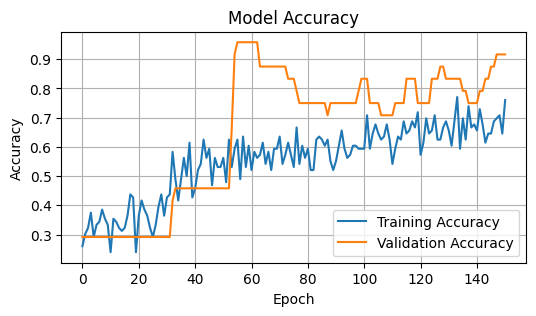

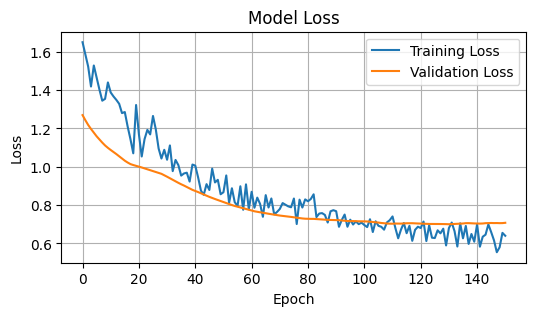

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


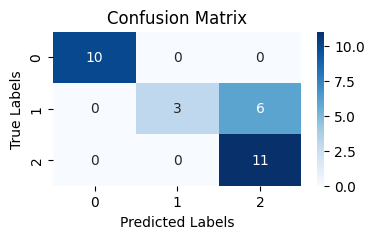

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.33      0.50         9
           2       0.65      1.00      0.79        11

    accuracy                           0.80        30
   macro avg       0.88      0.78      0.76        30
weighted avg       0.87      0.80      0.77        30



In [24]:
x=df[['sepal length (cm)','petal length (cm)']]
y=df['target']
y=tf.keras.utils.to_categorical(y, num_classes=3)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


model= models.Sequential ([layers.Dense(units = 16, activation='relu',input_shape = (2,)),layers.Dropout(0.3),
                          layers.Dense(units = 8, activation='relu'),layers.Dropout(0.3),
                          layers.Dense(units = 3, activation='softmax')])

model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20, restore_best_weights=True)
history = model.fit(x_train,y_train,epochs=200,verbose=1,validation_split=0.2,callbacks=[early_stopping])


# Plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

yp=model.predict(x_test)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Check if the arrays are one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

if len(yp.shape) > 1 and yp.shape[1] > 1:
    yp = np.argmax(yp, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, yp)

# Visualize the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate the classification report
report = classification_report(y_test, yp)
print("Classification Report:")
print(report)

# diabetes

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models,layers
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


In [45]:
df1=pd.read_csv("diabetes.csv")

In [46]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
df1.duplicated().sum()

0

In [47]:
scaler = MinMaxScaler()
df1["Glucose"] = scaler.fit_transform(df1[["Glucose"]])


In [48]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.743719,72,35,0,33.6,0.627,50,1
1,1,0.427136,66,29,0,26.6,0.351,31,0
2,8,0.919598,64,0,0,23.3,0.672,32,1
3,1,0.447236,66,23,94,28.1,0.167,21,0
4,0,0.688442,40,35,168,43.1,2.288,33,1


In [49]:
df1["BloodPressure"] = scaler.fit_transform(df1[["BloodPressure"]])

In [50]:
df1["SkinThickness"] = scaler.fit_transform(df1[["SkinThickness"]])

In [51]:
df1["Insulin"] = scaler.fit_transform(df1[["Insulin"]])

In [52]:
df1["BMI"] = scaler.fit_transform(df1[["BMI"]])

In [54]:
df1["DiabetesPedigreeFunction"] = scaler.fit_transform(df1[["DiabetesPedigreeFunction"]])

In [56]:
df1["Age"] = scaler.fit_transform(df1[["Age"]])

In [58]:
df1["Pregnancies"] = scaler.fit_transform(df1[["Pregnancies"]])

In [59]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6342 - loss: 0.6796 - val_accuracy: 0.6098 - val_loss: 0.6883
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6341 - loss: 0.6690 - val_accuracy: 0.6098 - val_loss: 0.6866
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6680 - loss: 0.6561 - val_accuracy: 0.6098 - val_loss: 0.6846
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6724 - loss: 0.6650 - val_accuracy: 0.6098 - val_loss: 0.6815
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6731 - loss: 0.6421 - val_accuracy: 0.6098 - val_loss: 0.6759
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6646 - loss: 0.6478 - val_accuracy: 0.6098 - val_loss: 0.6712
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6492 - loss: 0.6516 - val_accuracy: 0.6098 - val_loss: 0.6663
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6051 - loss: 0.6586 - val_accuracy: 0.6098 - 

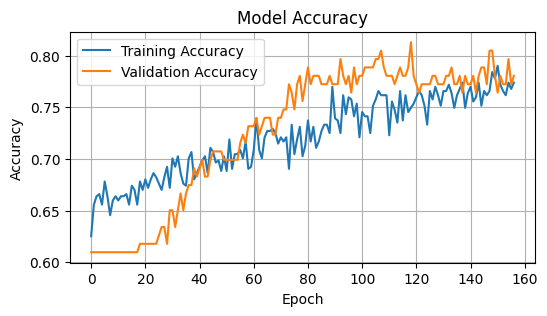

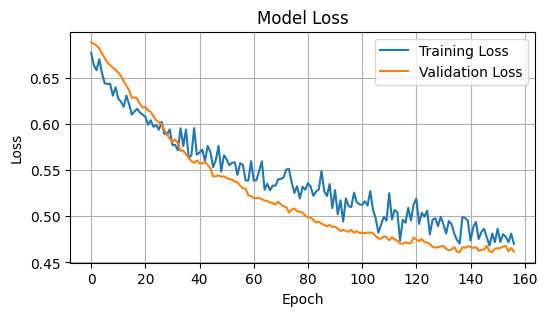

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


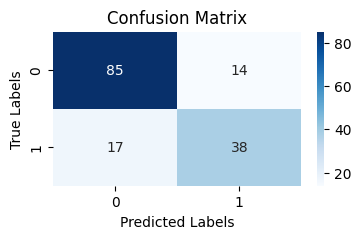

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        99
           1       0.73      0.69      0.71        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



In [64]:
x=df1[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df1['Outcome']
y=tf.keras.utils.to_categorical(y, num_classes=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


model= models.Sequential ([layers.Dense(units = 16, activation='relu',input_shape = (8,)),layers.Dropout(0.3),
                          layers.Dense(units = 8, activation='relu'),layers.Dropout(0.3),
                          layers.Dense(units = 2, activation='softmax')])

model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20, restore_best_weights=True)
history = model.fit(x_train,y_train,epochs=200,verbose=1,validation_split=0.2,callbacks=[early_stopping])


# Plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

yp=model.predict(x_test)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Check if the arrays are one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

if len(yp.shape) > 1 and yp.shape[1] > 1:
    yp = np.argmax(yp, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, yp)

# Visualize the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate the classification report
report = classification_report(y_test, yp)
print("Classification Report:")
print(report)

In [61]:
num_classes = len(np.unique(df1['Outcome']))
num_classes

2